# Static analysis of an aircraft

In [4]:
from Airframe import Airframe
from misc import *

import numpy as np
import matplotlib.pyplot as plt

#### Load aircraft model

In [5]:
airframe = Airframe.from_json("rc.json") # An RC aircraft model

## Longitudinal stability

### Torque calculation

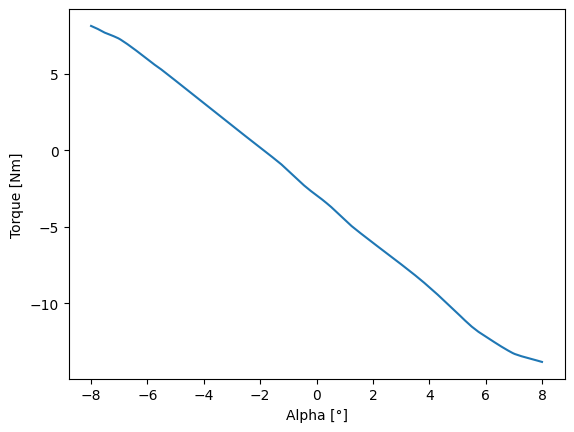

In [6]:
N = 200 # number of points to sample

alphas = np.linspace(-8, 8, N)
taus = np.zeros(N)

rho = 1.293 # air density
v = 10 # 10 m/s velocity

for i, a in enumerate(alphas):
    
    tau = 0 # torque
    tau += 9.81 * airframe.m * airframe.cm[0, 0] # mass torque

    for surface in airframe.surfaces.values():

        if surface["Vertical"]:
            continue

        Cl = 0 # coefficient of lift

        alpha = (a + surface["Angle"])/180*np.pi

        if surface["Type"] == "Symetric":
            Cl, _ = symetricC(alpha)

        elif surface["Type"] == "Positive":
            Cl, _ = positiveC(alpha)

        elif surface["Type"] == "Negative":
            Cl, _ = negativeC(alpha)


        Fl = Cl * rho * v**2 * surface["Area"] # force of lift

        tau += Fl * surface["Position"][0, 0] # torque

    taus[i] = tau

plt.plot(alphas, taus)
plt.xlabel("Alpha [°]")
plt.ylabel("Torque [Nm]")
plt.show()
